In [2]:
import random

def generate_sample_clients_data(num_clients, num_classes, min_samples, max_samples):
    clients_data = []
    
    for _ in range(num_clients):
        num_samples = random.randint(min_samples, max_samples)
        client_data = [random.randint(0, num_classes - 1) for _ in range(num_samples)]
        clients_data.append(client_data)
    
    return clients_data




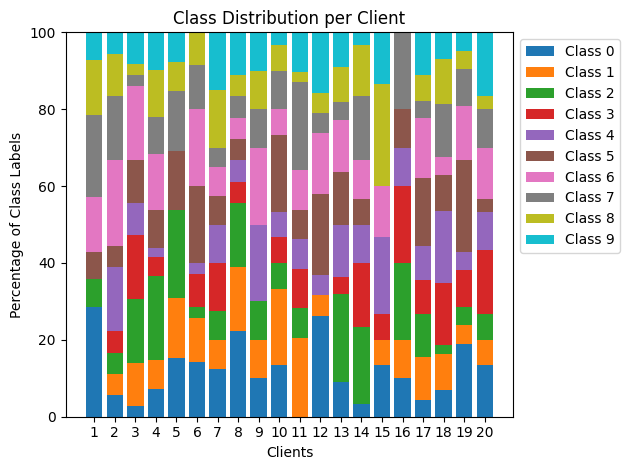

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def plot_clients_class_distribution(clients_data):
    num_classes = max(max(client_data) for client_data in clients_data) + 1
    clients_counts = [np.bincount(client_data, minlength=num_classes) for client_data in clients_data]
    clients_percentages = [counts / sum(counts) * 100 for counts in clients_counts]

    fig, ax = plt.subplots()
    for idx, percentages in enumerate(clients_percentages):
        bottom = 0
        for class_idx, percentage in enumerate(percentages):
            ax.bar(idx, percentage, bottom=bottom, label=f'Class {class_idx}' if idx == 0 else None)
            bottom += percentage

    ax.set_xticks(range(len(clients_data)))
    ax.set_xticklabels([f'{i+1}' for i in range(len(clients_data))])
    ax.set_xlabel('Clients')
    ax.set_ylabel('Percentage of Class Labels')
    ax.set_ylim(0, 100)
    ax.set_title('Class Distribution per Client')
    ax.legend(loc='upper left', bbox_to_anchor=(1, 1))
    plt.tight_layout()
    plt.show()

# 샘플 클라이언트 데이터 생성
num_clients = 20
num_classes = 10
min_samples = 10
max_samples = 50


clients_data = generate_sample_clients_data(num_clients, num_classes, min_samples, max_samples)
plot_clients_class_distribution(clients_data)

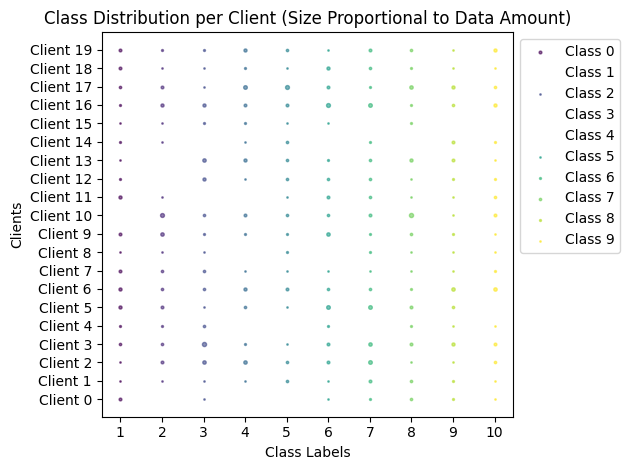

In [4]:
def plot_clients_class_distribution_scatter(clients_data):
    num_classes = max(max(client_data) for client_data in clients_data) + 1
    clients_counts = [np.bincount(client_data, minlength=num_classes) for client_data in clients_data]
    clients_percentages = [counts / sum(counts) for counts in clients_counts]

    fig, ax = plt.subplots()
    colors = plt.cm.viridis(np.linspace(0, 1, num_classes))

    for client_idx, percentages in enumerate(clients_percentages):
        for class_idx, percentage in enumerate(percentages):
            size = percentage * sum(clients_counts[client_idx])
            ax.scatter(class_idx, client_idx, s=size, c=colors[class_idx].reshape(1, -1), label=f'Class {class_idx}' if client_idx == 0 else None, alpha=0.6)

    ax.set_xticks(range(num_classes))
    ax.set_xticklabels([f'{i+1}' for i in range(num_classes)])
    ax.set_xlabel('Class Labels')
    ax.set_yticks(range(len(clients_data)))
    ax.set_yticklabels([f'Client {i}' for i in range(len(clients_data))])
    ax.set_ylabel('Clients')
    ax.set_title('Class Distribution per Client (Size Proportional to Data Amount)')
    ax.legend(loc='upper left', bbox_to_anchor=(1, 1))
    plt.tight_layout()
    plt.show()
    
plot_clients_class_distribution_scatter(clients_data)

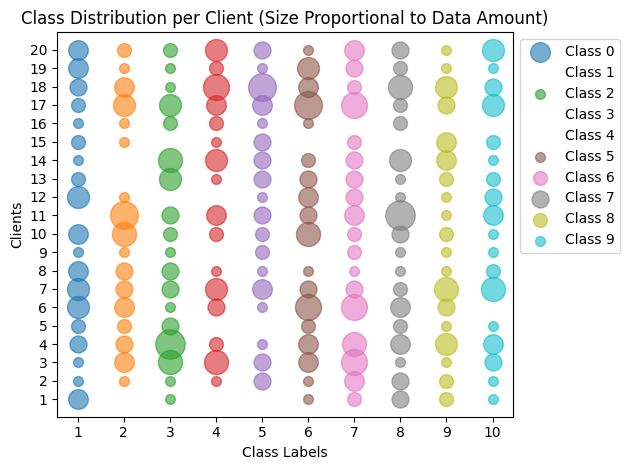

In [5]:
def plot_clients_class_distribution_scatter_v2(clients_data, scale_factor=50):
    num_classes = max(max(client_data) for client_data in clients_data) + 1
    clients_counts = [np.bincount(client_data, minlength=num_classes) for client_data in clients_data]
    clients_percentages = [counts / sum(counts) for counts in clients_counts]

    fig, ax = plt.subplots()
    colors = plt.cm.tab10(np.linspace(0, 1, num_classes))

    for client_idx, percentages in enumerate(clients_percentages):
        for class_idx, percentage in enumerate(percentages):
            size = percentage * sum(clients_counts[client_idx]) * scale_factor
            ax.scatter(class_idx, client_idx, s=size, c=colors[class_idx].reshape(1, -1), label=f'Class {class_idx}' if client_idx == 0 else None, alpha=0.6)

    ax.set_xticks(range(num_classes))
    ax.set_xticklabels([f'{i+1}' for i in range(num_classes)])
    ax.set_xlabel('Class Labels')
    ax.set_yticks(range(len(clients_data)))
    ax.set_yticklabels([f'{i+1}' for i in range(len(clients_data))])
    ax.set_ylabel('Clients')
    ax.set_title('Class Distribution per Client (Size Proportional to Data Amount)')
    ax.legend(loc='upper left', bbox_to_anchor=(1, 1))
    plt.tight_layout()
    plt.show()

# 함수 호출
plot_clients_class_distribution_scatter_v2(clients_data, scale_factor=50)

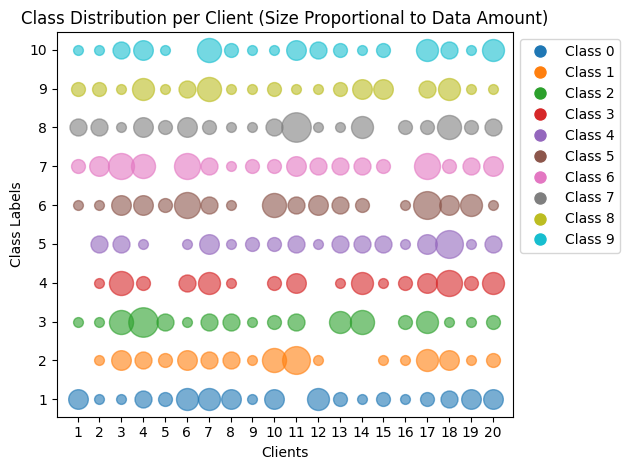

In [6]:
def plot_clients_class_distribution_scatter_v3(clients_data, scale_factor=50):
    num_classes = max(max(client_data) for client_data in clients_data) + 1
    clients_counts = [np.bincount(client_data, minlength=num_classes) for client_data in clients_data]
    clients_percentages = [counts / sum(counts) for counts in clients_counts]

    fig, ax = plt.subplots()
    colors = plt.cm.tab10(np.linspace(0, 1, num_classes))
    legend_elements = []

    for class_idx in range(num_classes):
        legend_elements.append(plt.Line2D([0], [0], marker='o', color='w', label=f'Class {class_idx}', markerfacecolor=colors[class_idx], markersize=10))

    for client_idx, percentages in enumerate(clients_percentages):
        for class_idx, percentage in enumerate(percentages):
            size = percentage * sum(clients_counts[client_idx]) * scale_factor
            ax.scatter(client_idx, class_idx, s=size, c=colors[class_idx].reshape(1, -1), alpha=0.6)

    ax.set_yticks(range(num_classes))
    ax.set_yticklabels([f'{i+1}' for i in range(num_classes)])
    ax.set_ylabel('Class Labels')
    ax.set_xticks(range(len(clients_data)))
    ax.set_xticklabels([f'{i+1}' for i in range(len(clients_data))])
    ax.set_xlabel('Clients')
    ax.set_title('Class Distribution per Client (Size Proportional to Data Amount)')
    ax.legend(handles=legend_elements, loc='upper left', bbox_to_anchor=(1, 1))
    plt.tight_layout()
    plt.show()

# 함수 호출
plot_clients_class_distribution_scatter_v3(clients_data, scale_factor=50)

In [7]:
def add_noise_to_labels(clients_data, num_classes, noise_rate=0.1):
    noisy_clients_data = []
    
    for client_data in clients_data:
        noisy_data = []
        for label in client_data:
            if random.random() < noise_rate:
                noisy_label = random.randint(0, num_classes - 1)
                while noisy_label == label:
                    noisy_label = random.randint(0, num_classes - 1)
                noisy_data.append(noisy_label)
            else:
                noisy_data.append(label)
        noisy_clients_data.append(noisy_data)
    
    return noisy_clients_data

num_classes = 10
noise_rate = 0.1
noisy_clients_data = add_noise_to_labels(clients_data, num_classes, noise_rate)
print(noisy_clients_data)

[[5, 0, 7, 6, 0, 7, 0, 8, 9, 7, 2, 7, 6, 8], [8, 7, 0, 4, 4, 1, 9, 6, 7, 6, 7, 1, 8, 5, 8, 6, 4, 7], [7, 9, 1, 4, 1, 3, 0, 9, 4, 3, 2, 2, 5, 2, 8, 3, 2, 0, 6, 4, 1, 6, 6, 3, 1, 3, 7, 6, 2, 8, 6, 6, 0, 5, 8, 4], [8, 2, 2, 6, 9, 2, 7, 2, 3, 9, 6, 5, 3, 8, 8, 7, 6, 0, 5, 2, 7, 4, 6, 1, 5, 8, 7, 2, 2, 7, 1, 0, 5, 6, 2, 8, 2, 2, 0, 7, 9], [2, 5, 1, 5, 2, 6, 9, 1, 2, 7, 0, 7, 2], [1, 5, 0, 0, 5, 0, 5, 6, 8, 5, 8, 1, 0, 5, 7, 6, 5, 7, 0, 8, 0, 0, 3, 6, 7, 6, 5, 1, 3, 7, 2, 3, 3, 5, 6], [0, 9, 8, 7, 7, 9, 8, 2, 6, 1, 3, 6, 4, 4, 8, 9, 9, 0, 1, 6, 4, 9, 4, 8, 5, 3, 6, 3, 3, 7, 1, 8, 2, 7, 0, 7, 4, 0, 2, 3], [9, 9, 6, 1, 2, 0, 5, 7, 1, 0, 3, 2, 0, 0, 1, 8, 4, 2], [2, 8, 6, 4, 6, 4, 7, 1, 9, 0], [1, 7, 1, 8, 1, 7, 0, 9, 1, 0, 4, 3, 5, 4, 3, 1, 3, 6, 6, 2, 5, 5, 8, 6, 2, 5, 1, 7, 1, 0], [2, 7, 3, 9, 7, 6, 3, 1, 7, 6, 7, 3, 6, 1, 7, 9, 9, 0, 1, 8, 1, 5, 8, 4, 7, 7, 1, 1, 1, 2, 2, 9, 4, 1, 5, 4, 6, 3, 5], [1, 0, 0, 4, 9, 0, 1, 5, 0, 6, 0, 9, 6, 5, 6, 5, 8, 7, 5], [4, 2, 8, 5, 2, 0, 3, 2, 7, 0, 2, 2,

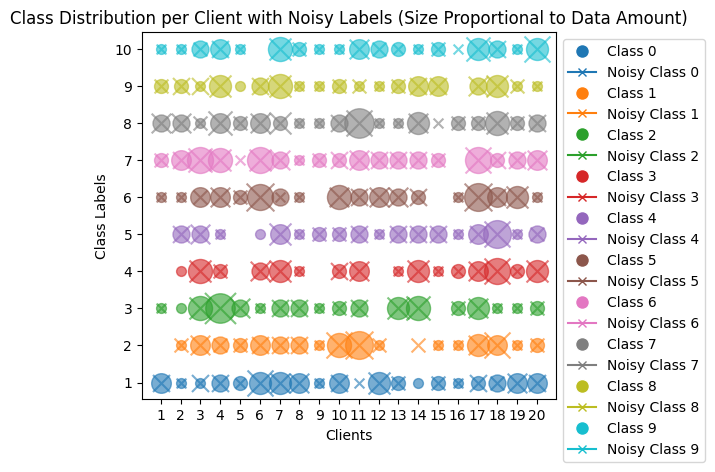

In [8]:
def plot_clients_class_distribution_scatter_with_noise(clients_data, noisy_clients_data, scale_factor=50):
    num_classes = max(max(client_data) for client_data in clients_data) + 1
    clients_counts = [np.bincount(client_data, minlength=num_classes) for client_data in clients_data]
    clients_percentages = [counts / sum(counts) for counts in clients_counts]
    
    noisy_clients_counts = [np.bincount(client_data, minlength=num_classes) for client_data in noisy_clients_data]
    noisy_clients_percentages = [counts / sum(counts) for counts in noisy_clients_counts]

    fig, ax = plt.subplots()
    colors = plt.cm.tab10(np.linspace(0, 1, num_classes))
    legend_elements = []

    for class_idx in range(num_classes):
        legend_elements.append(plt.Line2D([0], [0], marker='o', color='w', label=f'Class {class_idx}', markerfacecolor=colors[class_idx], markersize=10))
        legend_elements.append(plt.Line2D([0], [0], marker='x', color=colors[class_idx], label=f'Noisy Class {class_idx}', linewidth=1.5))

    for client_idx, (percentages, noisy_percentages) in enumerate(zip(clients_percentages, noisy_clients_percentages)):
        for class_idx, (percentage, noisy_percentage) in enumerate(zip(percentages, noisy_percentages)):
            size = percentage * sum(clients_counts[client_idx]) * scale_factor
            noisy_size = noisy_percentage * sum(clients_counts[client_idx]) * scale_factor
            ax.scatter(client_idx, class_idx, s=size, c=colors[class_idx].reshape(1, -1), alpha=0.6)
            ax.scatter(client_idx, class_idx, s=noisy_size, marker='x', c=colors[class_idx].reshape(1, -1), alpha=0.6)

    ax.set_yticks(range(num_classes))
    ax.set_yticklabels([f'{i+1}' for i in range(num_classes)])
    ax.set_ylabel('Class Labels')
    ax.set_xticks(range(len(clients_data)))
    ax.set_xticklabels([f'{i+1}' for i in range(len(clients_data))])
    ax.set_xlabel('Clients')
    ax.set_title('Class Distribution per Client with Noisy Labels (Size Proportional to Data Amount)')
    ax.legend(handles=legend_elements, loc='upper left', bbox_to_anchor=(1, 1))
    plt.tight_layout()
    plt.show()
    
plot_clients_class_distribution_scatter_with_noise(clients_data, noisy_clients_data, scale_factor=50)

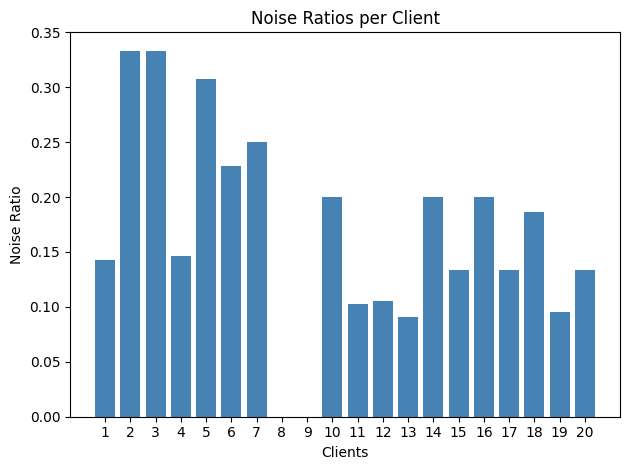

In [9]:
def plot_noise_ratios_bar_chart(clients_data, noisy_clients_data):
    num_classes = max(max(client_data) for client_data in clients_data) + 1
    clients_counts = [np.bincount(client_data, minlength=num_classes) for client_data in clients_data]
    noisy_clients_counts = [np.bincount(client_data, minlength=num_classes) for client_data in noisy_clients_data]
    
    noise_ratios = []
    for client_idx, (client_count, noisy_client_count) in enumerate(zip(clients_counts, noisy_clients_counts)):
        total_noise = sum(abs(client_count - noisy_client_count))
        noise_ratio = total_noise / sum(client_count)
        noise_ratios.append(noise_ratio)
    
    fig, ax = plt.subplots()
    ax.bar(range(len(clients_data)), noise_ratios, color='steelblue')
    
    ax.set_xticks(range(len(clients_data)))
    ax.set_xticklabels([f'{i+1}' for i in range(len(clients_data))])
    ax.set_xlabel('Clients')
    ax.set_ylabel('Noise Ratio')
    ax.set_title('Noise Ratios per Client')
    plt.tight_layout()
    plt.show()

# 함수 호출
plot_noise_ratios_bar_chart(clients_data, noisy_clients_data)

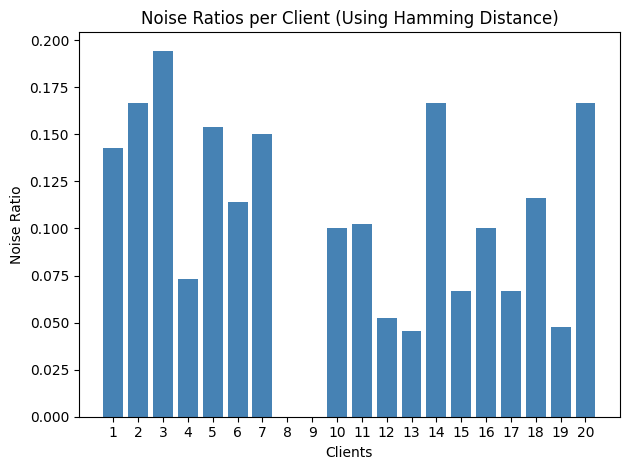

In [10]:
def hamming_distance(client_data, noisy_client_data):
    assert len(client_data) == len(noisy_client_data)
    return sum(x != y for x, y in zip(client_data, noisy_client_data))

def plot_noise_ratios_hamming_bar_chart(clients_data, noisy_clients_data):
    noise_ratios = []
    
    for client_data, noisy_client_data in zip(clients_data, noisy_clients_data):
        distance = hamming_distance(client_data, noisy_client_data)
        noise_ratio = distance / len(client_data)
        noise_ratios.append(noise_ratio)
    
    fig, ax = plt.subplots()
    ax.bar(range(len(clients_data)), noise_ratios, color='steelblue')
    
    ax.set_xticks(range(len(clients_data)))
    ax.set_xticklabels([f'{i+1}' for i in range(len(clients_data))])
    ax.set_xlabel('Clients')
    ax.set_ylabel('Noise Ratio')
    ax.set_title('Noise Ratios per Client (Using Hamming Distance)')
    plt.tight_layout()
    plt.show()

# 함수 호출
plot_noise_ratios_hamming_bar_chart(clients_data, noisy_clients_data)

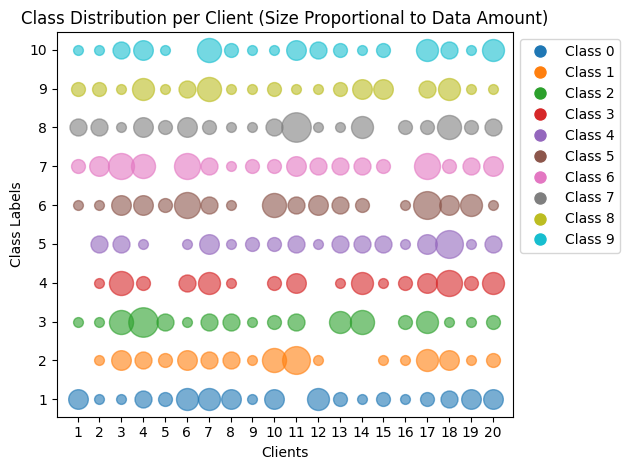

In [11]:
def plot_clients_class_distribution_scatter_v3(clients_data, scale_factor=50):
    num_classes = max(max(client_data) for client_data in clients_data) + 1
    clients_counts = [np.bincount(client_data, minlength=num_classes) for client_data in clients_data]
    clients_percentages = [counts / sum(counts) for counts in clients_counts]

    fig, ax = plt.subplots()
    colors = plt.cm.tab10(np.linspace(0, 1, num_classes))
    legend_elements = []

    for class_idx in range(num_classes):
        legend_elements.append(plt.Line2D([0], [0], marker='o', color='w', label=f'Class {class_idx}', markerfacecolor=colors[class_idx], markersize=10))

    for client_idx, percentages in enumerate(clients_percentages):
        for class_idx, percentage in enumerate(percentages):
            size = percentage * sum(clients_counts[client_idx]) * scale_factor
            ax.scatter(client_idx, class_idx, s=size, c=colors[class_idx].reshape(1, -1), alpha=0.6)

    ax.set_yticks(range(num_classes))
    ax.set_yticklabels([f'{i+1}' for i in range(num_classes)])
    ax.set_ylabel('Class Labels')
    ax.set_xticks(range(len(clients_data)))
    ax.set_xticklabels([f'{i+1}' for i in range(len(clients_data))])
    ax.set_xlabel('Clients')
    ax.set_title('Class Distribution per Client (Size Proportional to Data Amount)')
    ax.legend(handles=legend_elements, loc='upper left', bbox_to_anchor=(1, 1))
    plt.tight_layout()
    plt.show()

# 함수 호출
plot_clients_class_distribution_scatter_v3(clients_data, scale_factor=50)

In [76]:
def plot_clients_changed_labels_v2(clients_data, noisy_clients_data, scale_factor=50):
    num_classes = max(max(client_data) for client_data in clients_data) + 1
    clients_counts = [np.bincount(client_data, minlength=num_classes) for client_data in clients_data]
    fig, ax = plt.subplots()
    changes_count = {f"Class {i}": 0 for i in range(num_classes)}

    colors = plt.cm.tab10(np.linspace(0, 1, num_classes))
    
    legend_elements = []
    for class_idx in range(num_classes):
        legend_elements.append(plt.Line2D([0], [0], marker='o', color='w', label=f'Class {class_idx+1}', markerfacecolor=colors[class_idx], markersize=10))


    org_cng = np.zeros((len(clients_data), num_classes))
    nys_cng = np.zeros((len(clients_data), num_classes))
    for client_idx, (client, noisy_client) in enumerate(zip(clients_data, noisy_clients_data)):
        for data_idx, (original_label, noisy_label) in enumerate(zip(client, noisy_client)):
            if original_label != noisy_label:
                org_cng[client_idx, original_label] += 1
                nys_cng[client_idx, noisy_label] += 1
    
    for client_idx in range(len(clients_data)):
        for class_idx in range(num_classes):
            color = colors[class_idx].reshape(1, -1)
            noisy_size = int(nys_cng[client_idx, class_idx])
            original_size = int(org_cng[client_idx, class_idx])
            delta = noisy_size - original_size
            
            text = f'+{noisy_size}' if noisy_size > 0 else ''
            text2 = f'{text}/' if text != '' else text
            text = f'{text2}-{original_size}' if original_size > 0 else text
            
            if original_size > noisy_size :
                # 데이터가 삭제된 클래스
                ax.scatter(client_idx, class_idx, s=clients_counts[client_idx][class_idx] * scale_factor, c=color, alpha=0.2, linewidths=0)
                ax.scatter(client_idx, class_idx, s=(clients_counts[client_idx][class_idx] + delta) * scale_factor, c=color, alpha=0.5, linewidths=0)
                ax.text(client_idx-.5, class_idx, text, fontsize=8, color='red')
            else : 
                # 노이즈가 추가된 클래스
                ax.scatter(client_idx, class_idx, s=(clients_counts[client_idx][class_idx] + delta) * scale_factor, c=color, alpha=0.9, linewidths=0)
                ax.scatter(client_idx, class_idx, s=clients_counts[client_idx][class_idx] * scale_factor, c='white', alpha=0.4, linewidths=0)
                ax.text(client_idx-.5, class_idx, text, fontsize=8, color='red')

    ax.set_yticks(range(num_classes))
    ax.set_yticklabels([f'{i+1}' for i in range(num_classes)])
    ax.set_ylabel('Class Labels')
    ax.set_xticks(range(len(clients_data)))
    ax.set_xticklabels([f'{i+1}' for i in range(len(clients_data))])
    ax.set_xlabel('Clients')
    ax.set_title('Class Distribution per Client (cifar10 / dirichlet0.1)')
    ax.legend(handles=legend_elements, loc='upper left', bbox_to_anchor=(1, 1))
    plt.tight_layout()

In [ ]:

# 함수 호출
plot_clients_changed_labels_v2(clients_data, noisy_clients_data, scale_factor=100)

In [65]:
# load real data
import pathlib
import numpy as np
import argparse
import sys
sys.path.append("/home/suncheol/code/FedTest/1_FED_MHAD/test/10_bm_cifar10_fedDF")
import utils
from dataset import Cifar10Partition

args = argparse.Namespace()
args.datapath = '~/.data'
args.N_parties = 20
args.num_classes = 10
args.alpha = 0.1
args.task = 'multilabel'
args.batch_size = 16
cifar10 = Cifar10Partition(args)
train_dataset, test_dataset = cifar10.load_partition(0)
labels = []
for i in range(20):
    train_dataset, test_dataset = cifar10.load_partition(i)
    labels.append(train_dataset.gt)

dataset.py::__init__:151
dataset.py::load_partition:161
train_images:  (84, 3, 224, 224) train_labels:  (84,)
dataset.py::load_partition:161
train_images:  (84, 3, 224, 224) train_labels:  (84,)
dataset.py::load_partition:161
train_images:  (660, 3, 224, 224) train_labels:  (660,)
dataset.py::load_partition:161
train_images:  (195, 3, 224, 224) train_labels:  (195,)
dataset.py::load_partition:161
train_images:  (45, 3, 224, 224) train_labels:  (45,)
dataset.py::load_partition:161
train_images:  (175, 3, 224, 224) train_labels:  (175,)
dataset.py::load_partition:161
train_images:  (100, 3, 224, 224) train_labels:  (100,)
dataset.py::load_partition:161
train_images:  (32, 3, 224, 224) train_labels:  (32,)
dataset.py::load_partition:161
train_images:  (533, 3, 224, 224) train_labels:  (533,)
dataset.py::load_partition:161
train_images:  (409, 3, 224, 224) train_labels:  (409,)
dataset.py::load_partition:161
train_images:  (44, 3, 224, 224) train_labels:  (44,)
dataset.py::load_partition:1

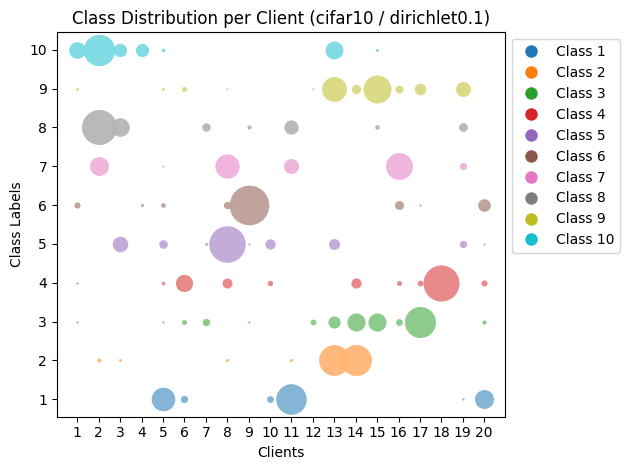

In [77]:
plot_clients_changed_labels_v2(labels, labels, scale_factor=2)
save_path = pathlib.Path('/home/suncheol/code/FedTest/1_FED_MHAD/test/10_bm_cifar10_fedDF/figs')
save_path.mkdir(parents=True, exist_ok=True)
plt.savefig(save_path / 'cifar10_class_distribution.png', dpi=300)
plt.show()
